In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [34]:
state_abbreviations = {"Alabama": "AL",
                       "Alaska": "AK",
                       "Arizona": "AZ",
                       "Arkansas": "AR",
                       "California": "CA",
                       "Colorado":"CO",
                       "Connecticut": "CT",
                       "Delaware": "DE",
                       "District of Columbia": "DC",
                       "Florida": "FL",
                       "Georgia": "GA",
                       "Hawaii": "HI",
                       "Idaho": "ID",
                       "Illinois": "IL", 
                       "Indiana": "IN",
                       "Iowa": "IA",
                       "Kansas": "KS",
                       "Kentucky": "KY",
                       "Louisiana": "LA",
                       "Maine": "ME",
                       "Maryland": "MD",
                       "Massachusetts":"MA",
                       "Michigan": "MI",
                       "Minnesota": "MN",
                       "Mississippi": "MS",
                       "Missouri": "MO",
                       "Montana": "MT",
                       "Nebraska": "NE",
                       "Nevada": "NV",
                       "New Hampshire": "NH",
                       "New Jersey": "NJ",
                       "New Mexico": "NM", 
                       "New York": "NY",
                       "North Carolina": "NC",
                       "North Dakota": "ND",
                       "Ohio": "OH",
                       "Oklahoma": "OK",
                       "Oregon": "OR",
                       "Pennsylvania": "PA",
                       "Rhode Island": "RI",
                       "South Carolina": "SC",
                       "South Dakota": "SD",
                       "Tennessee": "TN",
                       "Texas": "TX",
                       "Utah": "UT",
                       "Vermont": "VT",
                       "Virginia": "VA",
                       "Washington": "WA",
                       "West Virginia": "WV",
                       "Wisconsin": "WI",
                       "Wyoming": "WY",
         }

In [35]:
# Reading median unemployment csv file
med_unemployment_csv = 'Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [36]:
# Reading the median income csv file
med_income_csv = '../Data/Median_Income.csv'
# med_income_csv = '../Work_David/Data/median_income.csv'
income_df = pd.read_csv(med_income_csv)
income_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
1,2005-01-01,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2,2006-01-01,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
3,2007-01-01,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
4,2008-01-01,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [37]:
# Cleaning the income_df dataframe
income_df['Year'] = income_df['Date'].str.split('-', expand=True)[0]
income_df = income_df.drop(columns=['Date', 'United States'])
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0,2004
1,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0,2005
2,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0,2006
3,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0,2007
4,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0,2008


In [38]:
income_df = income_df.groupby('Year').median()
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [51]:
# Creating a dataframe for the median incomes and median unemployment rates for each state
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Income': income_df[states].median(),
                     'Median Unemployment Rate': unemployment_df[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Income,Median Unemployment Rate
Alabama,AL,44495.0,5.55
Alaska,AK,68180.0,6.60
Arizona,AZ,50750.0,5.15
Arkansas,AR,42050.0,5.25
California,CA,60640.0,6.25


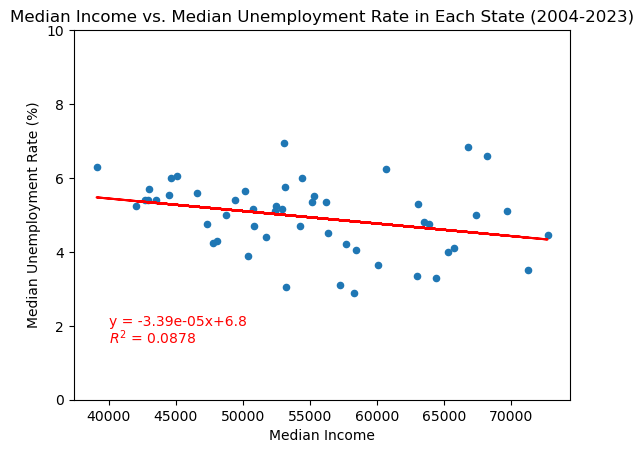

In [85]:
# Plotting the relationship of median income and median unemployment rate
plot = data.plot(kind='scatter', x='Median Income', y='Median Unemployment Rate', 
                 ylabel='Median Unemployment Rate (%)',
                 title='Median Income vs. Median Unemployment Rate in Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Income'], data['Median Unemployment Rate'])
plot.plot(data['Median Income'], intercept + slope * data['Median Income'], 'r', label='Fitted line');
plot.set_ylim(0, 10)
plot.annotate(text=f'y = {round(slope, 7)}x+{round(intercept, 2)}', xy=(40000, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(40000, 1.5), color='red');

figure = plot.get_figure()
figure.savefig('Visualizations/Linear_Regression_Median_Income_vs_Median_Unemployment_Rate.png')